<a href="https://colab.research.google.com/github/Lee-Gunju/GraphEmbedding-For-Soccer-Tactical-Formations/blob/main/football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataframe = pd.read_excel('Data.xlsx',  sheet_name = ['19-20', '18-19', '17-18', '16-17', '15-16', '14-15', '13-14', '12-13', '11-12', '10-11'])
concat_df = pd.concat(dataframe, axis= 0, ignore_index=True)

In [4]:
concat_df.shape

(380, 38)

In [5]:
concat_df

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum
0,1 round,Aston Villa,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-2-1-2,Low,2019-2020,70.1,Win,0,11
1,2 round,Manchester City,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,High,2019-2020,44.6,Draw,1,11
2,3 round,New castle,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,Mid,2019-2020,80.2,Lose,0,11
3,4 round,Asenal,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-0-2,High,2019-2020,45.2,Draw,1,11
4,5 round,Crystal Palace,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-3-0-2,Mid,2019-2020,64.1,Win,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,34 round,Chelsea,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-1-1,High,2010-2011,47.6,Lose,1,11
376,35 round,Blackpool,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,4-0-4-0-2,Low,2010-2011,58.6,Draw,0,11
377,36 round,Manchester City,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,4-2-3-0-1,High,2010-2011,61.9,Lose,0,11
378,37 round,Liverpool,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-1-1,High,2010-2011,46.5,Win,1,11


In [6]:
label_formation = concat_df['Formation'].unique().tolist()
season = concat_df['Season'].unique().tolist()
opp_level = concat_df['Opp_Level'].unique().tolist()
oppense_team = concat_df['상대팀'].unique().tolist()
match_order = concat_df['경기순서'].unique().tolist()
win_cate = concat_df['Win'].unique().tolist()


In [8]:
formation_to_encoded = {x: i for i, x in enumerate(label_formation)}
index_to_formation = {i: x for i, x in enumerate(label_formation)}

season_to_encoded = {x: i for i, x in enumerate(season)}
index_to_season = {i: x for i, x in enumerate(season)} 

opp_level_to_encoded = {x: i for i, x in enumerate(opp_level)}
index_to_opp_level = {i: x for i, x in enumerate(opp_level)} 

oppense_team_to_encoded = {x: i for i, x in enumerate(oppense_team)}
index_to_oppense_team = {i: x for i, x in enumerate(oppense_team)} 

match_order_to_encoded = {x: i for i, x in enumerate(match_order)}
index_to_match_order = {i: x for i, x in enumerate(match_order)} 

win_to_encoded = {x: i for i, x in enumerate(win_cate)}
index_to_win = {i: x for i, x in enumerate(win_cate)} 

In [9]:
win_to_encoded

{'Draw': 1, 'Lose': 2, 'Win': 0}

In [10]:
index_to_win

{0: 'Win', 1: 'Draw', 2: 'Lose'}

In [11]:
label_formation

['4-1-2-1-2',
 '4-1-1-1-3',
 '4-1-3-0-2',
 '3-1-3-2-1',
 '4-1-2-0-3',
 '4-0-2-1-3',
 '4-2-0-1-3',
 '4-1-3-1-1',
 '3-1-2-2-2',
 '4-1-0-2-3',
 '5-1-1-2-1',
 '3-2-2-0-3',
 '4-1-2-2-1',
 '4-2-2-0-2',
 '4-2-2-1-1',
 '3-2-2-2-1',
 '3-2-3-0-2',
 '3-1-3-1-2',
 '5-1-2-0-2',
 '3-1-4-1-1',
 '3-1-3-0-3',
 '3-1-4-0-2',
 '4-1-1-0-4',
 '3-1-2-1-3',
 '4-0-3-0-3',
 '4-0-3-1-2',
 '4-0-2-2-2',
 '4-0-4-1-1',
 '4-0-4-0-2',
 '4-1-4-0-1',
 '4-2-3-0-1']

In [12]:
len(label_formation)

31

In [13]:
oppense_team_to_encoded

{'Asenal': 3,
 'Aston Villa': 0,
 'Birmingham': 33,
 'Blackburn': 31,
 'Blackpool': 34,
 'Bolton': 32,
 'Bournemouth': 13,
 'Brighton': 7,
 'Burnley ': 15,
 'Cardiff City': 21,
 'Chelsea': 17,
 'Crystal Palace': 4,
 'Everton': 10,
 'Fulham': 19,
 'Huddersfield': 20,
 'Hull City': 27,
 'Leicester City': 5,
 'Liverpool': 9,
 'Manchester City': 1,
 'Manchester Utd': 14,
 'Middlesbrough': 26,
 'New castle': 2,
 'Norwich City': 18,
 'QPR': 28,
 'Reading': 29,
 'Sheffield': 11,
 'Southampton': 6,
 'Stoke City': 24,
 'Sunderland': 25,
 'Swansea City': 22,
 'Watford ': 8,
 'West Bromwich Albion': 23,
 'Westham': 12,
 'Wigan': 30,
 'Wolverhampton': 16}

In [15]:
concat_df['label'] = concat_df['Formation'].map(formation_to_encoded)
concat_df['match_order'] = concat_df['경기순서'].map(match_order_to_encoded)
concat_df['oppense_team'] = concat_df['상대팀'].map(oppense_team_to_encoded)
concat_df['oppense_level'] = concat_df['Opp_Level'].map(opp_level_to_encoded)
concat_df['season'] = concat_df['Season'].map(season_to_encoded)

concat_df['win_index'] = concat_df['Win'].map(win_to_encoded)

In [16]:
concat_df

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,label,match_order,oppense_team,oppense_level,season,win_index
0,1 round,Aston Villa,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-2-1-2,Low,2019-2020,70.1,Win,0,11,0,0,0,0,0,0
1,2 round,Manchester City,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,High,2019-2020,44.6,Draw,1,11,1,1,1,1,0,1
2,3 round,New castle,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,Mid,2019-2020,80.2,Lose,0,11,1,2,2,2,0,2
3,4 round,Asenal,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-0-2,High,2019-2020,45.2,Draw,1,11,2,3,3,1,0,1
4,5 round,Crystal Palace,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-3-0-2,Mid,2019-2020,64.1,Win,0,11,2,4,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,34 round,Chelsea,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-1-1,High,2010-2011,47.6,Lose,1,11,7,33,17,1,9,2
376,35 round,Blackpool,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,4-0-4-0-2,Low,2010-2011,58.6,Draw,0,11,28,34,34,0,9,1
377,36 round,Manchester City,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,4-2-3-0-1,High,2010-2011,61.9,Lose,0,11,30,35,1,1,9,2
378,37 round,Liverpool,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-1-1,High,2010-2011,46.5,Win,1,11,7,36,9,1,9,0


In [19]:
df = concat_df.sample(frac=1, random_state=42)

In [20]:
df

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,label,match_order,oppense_team,oppense_level,season,win_index
266,1 round,New castle,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,4-0-2-1-3,Low,2012-2013,48.1,Lose,1,11,5,0,2,0,7,2
261,34 round,West Bromwich Albion,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,4-0-2-2-2,Low,2013-2014,67.6,Draw,0,11,26,33,23,0,6,1
265,38 round,Aston Villa,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,4-1-2-1-2,Low,2013-2014,54.6,Win,1,11,0,37,0,0,6,0
39,2 round,Fulham,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,3-1-2-2-2,Low,2018-2019,59.6,Win,0,11,8,1,19,0,1,0
33,34 round,Bournemouth,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,4-1-2-0-3,Low,2019-2020,64.3,Draw,0,11,4,33,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34 round,Huddersfield,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,3-1-3-1-2,Low,2018-2019,70.0,Win,0,11,17,33,20,0,1,0
106,31 round,Chelsea,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-1-1-3,High,2017-2018,51.3,Win,1,11,1,30,17,1,2,0
270,5 round,QPR,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,4-0-2-1-3,Low,2012-2013,43.3,Win,1,11,5,4,28,0,7,0
348,7 round,Aston Villa,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,4-0-4-0-2,Mid,2010-2011,53.1,Win,1,11,28,6,0,2,9,0


In [21]:
df.columns

Index(['경기순서', '상대팀', 'FW0', 'FW0B', 'FW1', 'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'Formation', 'Opp_Level', 'Season',
       'Ball_pos', 'Win', 'Style', 'sum', 'label', 'match_order',
       'oppense_team', 'oppense_level', 'season', 'win_index'],
      dtype='object')

In [22]:
min_match_order = min(df["match_order"])
max_match_order = max(df["match_order"])

min_oppense_team = min(df["oppense_team"])
max_oppense_team = max(df["oppense_team"])


min_oppense_level = min(df["oppense_level"])
max_oppense_level = max(df["oppense_level"])

min_season = min(df["season"])
max_season = max(df["season"])

min_ball_pos = min(df['Ball_pos'])
max_ball_pos = max(df['Ball_pos'])



In [30]:
df['reg_match_order'] = df["match_order"].apply(lambda x: (x - min_match_order) / (max_match_order - min_match_order)).values
df['reg_oppense_team'] = df["oppense_team"].apply(lambda x: (x - min_oppense_team) / (max_oppense_team - min_oppense_team)).values
df['reg_oppense_level'] = df["oppense_level"].apply(lambda x: (x - min_oppense_level) / (max_oppense_level - min_oppense_level)).values
df['reg_season'] = df["season"].apply(lambda x: (x - min_season) / (max_season - min_season)).values
df['reg_ball_pos'] = df["Ball_pos"].apply(lambda x: (x - min_ball_pos) / (max_ball_pos - min_ball_pos)).values



In [31]:
df

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,label,match_order,oppense_team,oppense_level,season,win_index,reg_match_order,reg_oppense_team,reg_oppense_level,reg_season,reg_ball_pos
256,29 round,Chelsea,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,4-2-0-1-3,High,2013-2014,46.4,Lose,1,11,6,28,17,1,6,2,0.756757,0.500000,0.5,0.666667,0.377532
366,25 round,Bolton,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,4-0-4-0-2,Mid,2010-2011,53.4,Win,1,11,28,24,32,2,9,0,0.648649,0.941176,1.0,1.000000,0.506446
4,5 round,Crystal Palace,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-3-0-2,Mid,2019-2020,64.1,Win,0,11,2,4,4,2,0,0,0.108108,0.117647,1.0,0.000000,0.703499
376,35 round,Blackpool,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,4-0-4-0-2,Low,2010-2011,58.6,Draw,0,11,28,34,34,0,9,1,0.918919,1.000000,0.0,1.000000,0.602210
208,19 round,Manchester Utd,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-1-1-3,High,2014-2015,48.4,Draw,1,11,1,18,14,1,5,1,0.486486,0.411765,0.5,0.555556,0.414365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,13 round,Bolton,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,4-0-3-1-2,Low,2011-2012,58.9,Win,0,11,25,12,32,0,8,0,0.324324,0.941176,0.0,0.888889,0.607735
17,18 round,Chelsea,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,4-1-2-0-3,High,2019-2020,44.5,Lose,1,11,4,17,17,1,0,2,0.459459,0.500000,0.5,0.000000,0.342541
324,21 round,Wolverhampton,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,4-0-4-1-1,Low,2011-2012,68.4,Draw,0,11,27,20,16,0,8,1,0.540541,0.470588,0.0,0.888889,0.782689
169,18 round,Norwich City,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-1-1-3,Low,2015-2016,59.8,Win,0,11,1,17,18,0,4,0,0.459459,0.529412,0.0,0.444444,0.624309


In [ ]:
# feature의 값을 정규화 적용
x = df[["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1','reg_match_order', 'reg_oppense_team', 'reg_oppense_level',
       'reg_season']].values.astype(np.float)



y = df["label"].values.astype(np.float)

In [ ]:
# feature 값들의 정규화 적용 x 

x = df[["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1','match_order', 'oppense_team', 'oppense_level',
       'season']].values.astype(np.float)



y = df["label"].values.astype(np.float)

In [ ]:
x = df[["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1']].values.astype(np.float)

y = df["label"].values.astype(np.float)

In [ ]:
len(x[0])

33

In [ ]:
np.mean(x[0])

0.35868488809665283

In [ ]:
train_indices = int(0.9 * df.shape[0])

In [ ]:
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
# 단순 모델
model = keras.Sequential([
                          layers.Input(shape=(x_train.shape[1])),
                          layers.Dense(52, activation='relu'),
                          layers.Dense(42, activation='relu'),
                          layers.Dense(31, activation='softmax')

])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.SparseCategoricalCrossentropy(), metrics =['acc'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 52)                1768      
_________________________________________________________________
dense_48 (Dense)             (None, 42)                2226      
_________________________________________________________________
dense_49 (Dense)             (None, 31)                1333      
Total params: 5,327
Trainable params: 5,327
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.1
)

Epoch 1/50
10/10 [==============================] - 0s 17ms/step - loss: 2.7239 - acc: 0.3681 - val_loss: 2.3174 - val_acc: 0.3143
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 2.0128 - acc: 0.4072 - val_loss: 1.7414 - val_acc: 0.3429
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 1.5893 - acc: 0.5831 - val_loss: 1.3369 - val_acc: 0.5429
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1760 - acc: 0.6840 - val_loss: 1.0136 - val_acc: 0.6571
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7960 - acc: 0.8176 - val_loss: 0.6745 - val_acc: 0.8286
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5009 - acc: 0.9088 - val_loss: 0.5438 - val_acc: 0.8000
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3288 - acc: 0.9251 - val_loss: 0.3881 - val_acc: 0.9143
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2357 - acc: 0.9

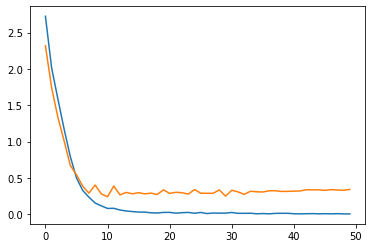

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
         

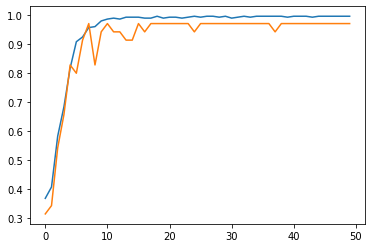

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
x_val

array([[1.        , 0.        , 0.        , ..., 0.44117647, 0.        ,
        0.11111111],
       [1.        , 0.        , 1.        , ..., 0.5       , 0.5       ,
        0.11111111],
       [1.        , 0.        , 0.        , ..., 0.11764706, 0.        ,
        0.44444444],
       ...,
       [1.        , 0.        , 0.        , ..., 0.82352941, 0.        ,
        0.77777778],
       [1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.08823529, 0.5       ,
        0.22222222]])

In [ ]:
model.evaluate(x= x_val, y=y_val)

2/2 [==============================] - 0s 4ms/step - loss: nan - acc: 0.8947


[nan, 0.8947368264198303]

In [ ]:
x_train[[0]]

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.05882353, 0.        , 0.77777778]])

In [ ]:
pred_data = pd.DataFrame(pred_data)
pred_data = pred_data.values

In [ ]:
x = df[["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1','match_order', 'oppense_team', 'oppense_level',
       'season']].values.astype(np.float)

In [ ]:
a = ["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1','match_order', 'oppense_team', 'oppense_level',
       'season']

In [ ]:
len(a)

33

In [ ]:
len(pred_data)

33

In [ ]:
pred = model.predict(x_train[[0]])

In [ ]:
index_to_formation[pred.argmax()]

'4-0-2-1-3'

In [ ]:
# 좀 더 복잡한 모델! 
model = keras.Sequential([
                          layers.Input(shape=(x_train.shape[1])),
                          layers.Dense(256, activation='relu'),
                          layers.Dense(128, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(42, activation='relu'),
                          layers.Dense(31, activation='relu'),
                          layers.Dense(31, activation='softmax')

])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=keras.losses.SparseCategoricalCrossentropy(), metrics =['acc'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               8704      
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_53 (Dense)             (None, 42)                2730      
_________________________________________________________________
dense_54 (Dense)             (None, 31)                1333      
_________________________________________________________________
dense_55 (Dense)             (None, 31)                992       
Total params: 54,911
Trainable params: 54,911
Non-trainable params: 0
_________________________________________________

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.1
)

Epoch 1/50
10/10 [==============================] - 1s 18ms/step - loss: 2.7313 - acc: 0.3616 - val_loss: 2.3487 - val_acc: 0.3143
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 1.9846 - acc: 0.4202 - val_loss: 1.8634 - val_acc: 0.3143
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 1.5141 - acc: 0.5049 - val_loss: 1.3082 - val_acc: 0.5714
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1214 - acc: 0.7068 - val_loss: 1.1346 - val_acc: 0.7143
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 1.0167 - acc: 0.7362 - val_loss: 0.8531 - val_acc: 0.8000
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7777 - acc: 0.7687 - val_loss: 0.7613 - val_acc: 0.8000
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5367 - acc: 0.8567 - val_loss: 0.6851 - val_acc: 0.8571
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.4686 - acc: 0.8

In [ ]:
model.evaluate(x= x_val, y=y_val)

2/2 [==============================] - 0s 6ms/step - loss: nan - acc: 0.8684


[nan, 0.8684210777282715]

#### 멀티 모델 분류 


In [45]:
df = df.sample(frac=1, random_state=42)

In [46]:
df

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,label,match_order,oppense_team,oppense_level,season,win_index,reg_match_order,reg_oppense_team,reg_oppense_level,reg_season,reg_ball_pos
70,33 round,Brighton,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-2-0-3,Low,2018-2019,78.5,Win,0,11,4,32,7,0,1,0,0.864865,0.205882,0.0,0.111111,0.968692
293,28 round,Asenal,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0,4-2-2-1-1,High,2012-2013,39.5,Win,1,11,14,27,3,1,7,0,0.729730,0.088235,0.5,0.777778,0.250460
208,19 round,Manchester Utd,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-1-1-3,High,2014-2015,48.4,Draw,1,11,1,18,14,1,5,1,0.486486,0.411765,0.5,0.555556,0.414365
17,18 round,Chelsea,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,4-1-2-0-3,High,2019-2020,44.5,Lose,1,11,4,17,17,1,0,2,0.459459,0.500000,0.5,0.000000,0.342541
117,4 round,Stoke City,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-1-1-3,Mid,2016-2017,60.3,Win,1,11,1,3,24,2,3,0,0.081081,0.705882,1.0,0.333333,0.633517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,38 round,Sunderland,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-3-1-1,Low,2012-2013,68.2,Win,0,11,7,37,25,0,7,0,1.000000,0.735294,0.0,0.777778,0.779006
173,22 round,Sunderland,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-1-1-3,Low,2015-2016,66.6,Win,0,11,1,21,25,0,4,0,0.567568,0.735294,0.0,0.444444,0.749540
194,5 round,West Bromwich Albion,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,4-1-1-1-3,Mid,2014-2015,62.2,Lose,0,11,1,4,23,2,5,2,0.108108,0.676471,1.0,0.555556,0.668508
3,4 round,Asenal,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-0-2,High,2019-2020,45.2,Draw,1,11,2,3,3,1,0,1,0.081081,0.088235,0.5,0.000000,0.355433


In [28]:
df.columns

Index(['경기순서', '상대팀', 'FW0', 'FW0B', 'FW1', 'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'Formation', 'Opp_Level', 'Season',
       'Ball_pos', 'Win', 'Style', 'sum', 'label', 'match_order',
       'oppense_team', 'oppense_level', 'season', 'win_index'],
      dtype='object')

In [47]:
#### 멀티 모델 분류 


# feature의 값을 정규화 적용
x = df[["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'reg_oppense_team', 'reg_oppense_level','reg_season','reg_ball_pos']].values.astype(np.float)



y_formation = df["label"].values.astype(np.float)
y_win_rating = df['win_index'].values.astype(np.float)
y_style = df['Style'].values.astype(np.float)

In [48]:
train_indices = int(0.9 * df.shape[0])

In [49]:
x_train, x_val, y_train_formation, y_val_formation, y_train_win_rating, y_val_win_rating, y_train_style, y_val_style = (
    x[:train_indices],
    x[train_indices:],
    y_formation[:train_indices],
    y_formation[train_indices:],
    y_win_rating[:train_indices],
    y_win_rating[train_indices:],
    y_style[:train_indices],
    y_style[train_indices:],

)

In [37]:
y_win_rating

array([1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 2., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 2., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 2., 1., 2., 0., 0., 2., 2., 1., 1., 0., 0., 2., 1., 0.,
       2., 2., 0., 1., 0., 1., 2., 2., 2., 0., 0., 1., 1., 2., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 2.,
       2., 0., 2., 0., 0., 0., 0., 1., 0., 2., 0., 2., 0., 2., 2., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 2., 0., 1., 0., 0., 2., 2., 2., 2., 0., 0., 2., 0., 1., 0.,
       1., 2., 1., 2., 0., 2., 0., 0., 1., 0., 0., 0., 2., 0., 1., 0., 2.,
       2., 0., 0., 0., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 2., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 2., 1., 2., 1., 1., 1., 1., 0., 1., 2., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 2., 2., 2., 0., 1., 0., 1., 2.,
       2., 0., 2., 2., 2.

In [ ]:
def formation_model():
  inputs = layers.Input(shape = (x_train.shape[1]))
  x = layers.Dense(256, activation='relu')(inputs)

  x_for = layers.Dense(128, activation='relu')(x)
  x_for = layers.Dense(64, activation='relu')(x_for)
  x_for = layers.Dense(42, activation='relu')(x_for)
  output_for = layers.Dense(31, activation='softmax')(x_for)

  return keras.Model(inputs = inputs, outputs = output_for)

In [ ]:
def win_model():
  inputs = layers.Input(shape = (x_train.shape[1]))
  x_win = layers.Dense(64)(inputs)
  x_win = layers.BatchNormalization()(x_win)
  x_win = layers.ReLU()(x_win)
  x_win = layers.Dropout(0.1)(x_win)

  x_win = layers.Dense(32)(x_win)
  x_win = layers.BatchNormalization()(x_win)
  x_win = layers.ReLU()(x_win)
  x_win = layers.Dropout(0.1)(x_win)

  x_win = layers.Dense(18)(x_win)
  x_win = layers.BatchNormalization()(x_win)
  x_win = layers.ReLU()(x_win)
  x_win = layers.Dropout(0.1)(x_win)

  x_win = layers.Dense(12)(x_win)
  x_win = layers.BatchNormalization()(x_win)
  x_win = layers.ReLU()(x_win)

  output_win = layers.Dense(3, activation='softmax')(x_win)

  return keras.Model(inputs = inputs, outputs = output_win)

In [ ]:
def style_model():
  inputs = layers.Input(shape = (x_train.shape[1]))
  x_style = layers.Dense(128, activation='relu')(x)
  x_style = layers.Dense(64, activation='relu')(x_style)
  x_style = layers.Dense(42, activation='relu')(x_style)
  x_style = layers.Dense(28, activation='relu')(x_style)
  x_style = layers.Dense(12, activation='relu')(x_style)
  output_win = layers.Dense(1, activation='softmax')(x_style)
  
  return keras.Model(inputs = inputs, outputs = )

In [38]:
def multi_model():
  inputs = layers.Input(shape = (x_train.shape[1]), name = 'input_features')
  x = layers.Dense(256, activation='relu')(inputs)

  x_for = layers.Dense(128, activation='relu')(x)
  x_for = layers.Dense(64, activation='relu')(x_for)
  x_for = layers.Dense(42, activation='relu')(x_for)
  output_for = layers.Dense(31, activation='softmax', name='output_for')(x_for)

  x_win = layers.Dense(128, activation='relu')(x)
  x_win = layers.Dense(64, activation='relu')(x_win)
  #x_win = layers.Dense(42, activation='relu')(x_win)
  #x_win = layers.Dense(28, activation='relu')(x_win)
  x_win = layers.Dense(12, activation='relu')(x_win)
  output_win = layers.Dense(3, activation='softmax', name='output_win')(x_win)

  x_style = layers.Dense(128, activation='relu')(x)
  x_style = layers.Dense(64, activation='relu')(x_style)
  #x_style = layers.Dense(42, activation='relu')(x_style)
  #x_style = layers.Dense(28, activation='relu')(x_style)
  x_style = layers.Dense(12, activation='relu')(x_style)
  output_style = layers.Dense(2, activation='softmax', name='output_style')(x_style)


  return keras.Model(inputs= inputs, outputs = [output_for, output_win, output_style], name = 'multi_model')




In [39]:
multi_model = multi_model()


In [40]:
multi_model.summary()

Model: "multi_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_features (InputLayer)     [(None, 33)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          8704        input_features[0][0]             
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          32896       dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 128)          32896       dense[0][0]                      
________________________________________________________________________________________

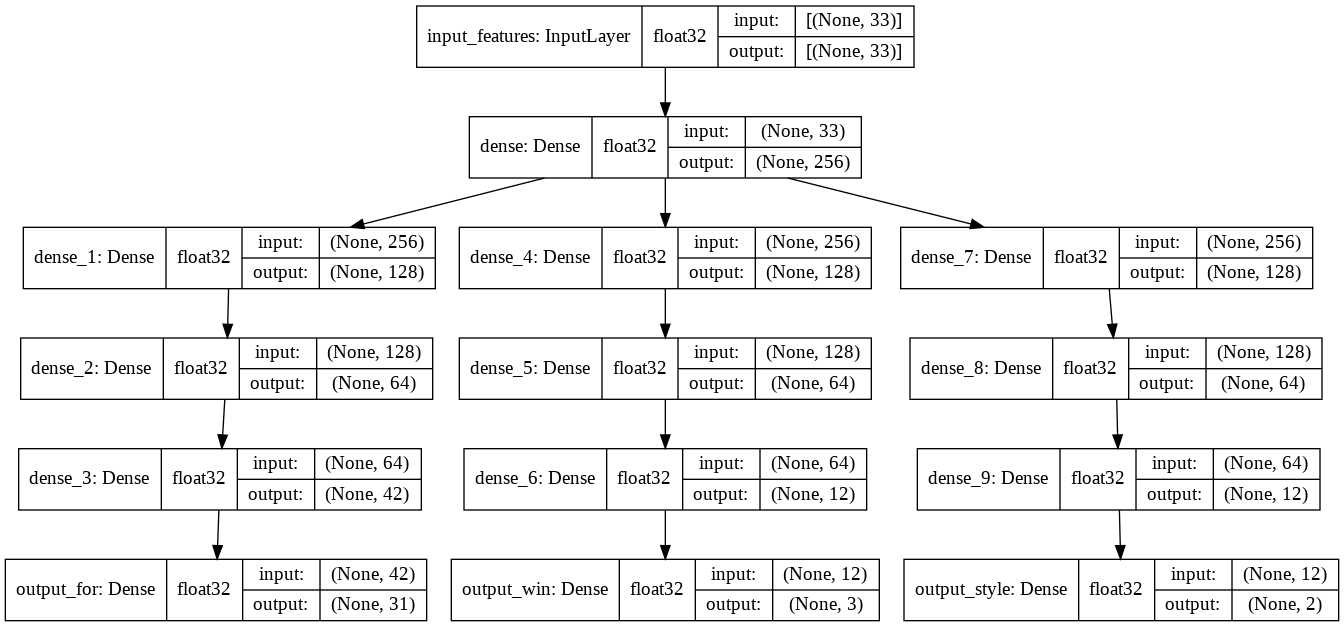

In [41]:
keras.utils.plot_model(multi_model, show_dtype=True, show_shapes=True)

In [50]:
multi_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01)
                                    , loss= {'output_for': keras.losses.SparseCategoricalCrossentropy(), 
                                            'output_win':keras.losses.SparseCategoricalCrossentropy(), 
                                            'output_style':keras.losses.SparseCategoricalCrossentropy()},
                    metrics= ['acc'])

In [51]:
history = multi_model.fit(x = x_train,
                y = [y_train_formation, y_train_win_rating, y_train_style],
                validation_split = 0.1,
                epochs=70)

Epoch 1/70
10/10 [==============================] - 1s 34ms/step - loss: 3.9676 - output_for_loss: 0.9941 - output_win_loss: 1.3011 - output_style_loss: 1.6725 - output_for_acc: 0.7622 - output_win_acc: 0.4788 - output_style_acc: 0.5863 - val_loss: 2.9796 - val_output_for_loss: 1.2705 - val_output_win_loss: 1.0177 - val_output_style_loss: 0.6914 - val_output_for_acc: 0.7143 - val_output_win_acc: 0.4571 - val_output_style_acc: 0.5429
Epoch 2/70
10/10 [==============================] - 0s 7ms/step - loss: 2.2837 - output_for_loss: 0.6471 - output_win_loss: 0.9427 - output_style_loss: 0.6938 - output_for_acc: 0.8208 - output_win_acc: 0.5472 - output_style_acc: 0.5277 - val_loss: 2.6931 - val_output_for_loss: 0.9485 - val_output_win_loss: 1.0631 - val_output_style_loss: 0.6816 - val_output_for_acc: 0.8571 - val_output_win_acc: 0.4571 - val_output_style_acc: 0.5429
Epoch 3/70
10/10 [==============================] - 0s 6ms/step - loss: 1.9692 - output_for_loss: 0.3765 - output_win_loss: 0.9

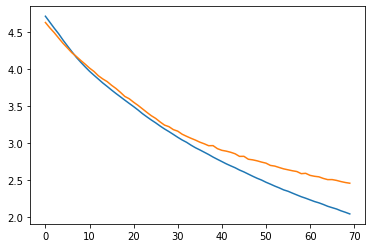

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
         

In [ ]:
history.history.keys()

dict_keys(['loss', 'output_for_loss', 'output_win_loss', 'output_style_loss', 'output_for_acc', 'output_win_acc', 'output_style_acc', 'val_loss', 'val_output_for_loss', 'val_output_win_loss', 'val_output_style_loss', 'val_output_for_acc', 'val_output_win_acc', 'val_output_style_acc'])

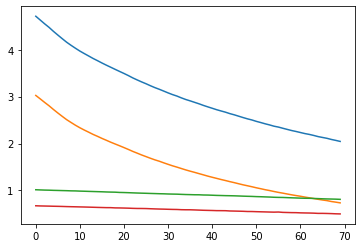

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['output_for_loss'])
plt.plot(history.history['output_win_loss'])
plt.plot(history.history['output_style_loss'])


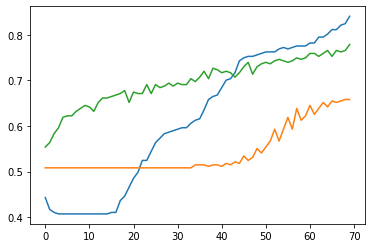

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['output_for_acc'])
plt.plot(history.history['output_win_acc'])
plt.plot(history.history['output_style_acc'])

         

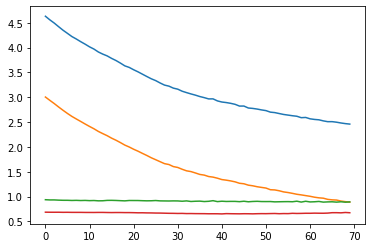

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['val_output_for_loss'])
plt.plot(history.history['val_output_win_loss'])
plt.plot(history.history['val_output_style_loss'])


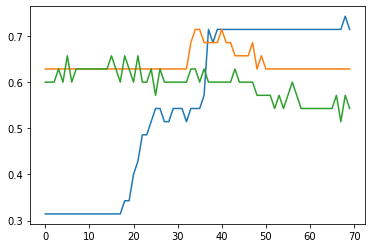

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_output_for_acc'])
plt.plot(history.history['val_output_win_acc'])
plt.plot(history.history['val_output_style_acc'])


In [52]:
multi_model.evaluate(x=x_val, y = [y_val_formation, y_val_win_rating, y_val_style])

2/2 [==============================] - 0s 6ms/step - loss: 7.5979 - output_for_loss: 1.9122 - output_win_loss: 4.5528 - output_style_loss: 1.1329 - output_for_acc: 0.8421 - output_win_acc: 0.3421 - output_style_acc: 0.7895


[7.5979461669921875,
 1.9122188091278076,
 4.552826404571533,
 1.1329015493392944,
 0.8421052694320679,
 0.34210526943206787,
 0.7894737124443054]

In [59]:
pred = multi_model.predict(x_val[:1])

In [66]:
print(index_to_formation[pred[0].argmax()])
print(index_to_win[pred[1].argmax()])
print(pred[2].argmax())

4-0-3-1-2
Win
0


In [69]:
pred[1].max() * 100

99.99996423721313

In [58]:
x_val[:1].shape

(1, 33)

In [64]:
index_to_formation[pred[0].argmax()]

'4-0-3-1-2'

### wide and deep model for structed data 


In [2]:
dataframe = pd.read_excel('Data.xlsx',  sheet_name = ['19-20', '18-19', '17-18', '16-17', '15-16', '14-15', '13-14', '12-13', '11-12', '10-11'])

In [3]:
concat_df = pd.concat(dataframe, axis= 0, ignore_index=True)

In [4]:
concat_df.shape

(380, 38)

In [7]:
label_formation = concat_df['Formation'].unique().tolist()
season = concat_df['Season'].unique().tolist()
opp_level = concat_df['Opp_Level'].unique().tolist()
oppense_team = concat_df['상대팀'].unique().tolist()
match_order = concat_df['경기순서'].unique().tolist()
win_cate = concat_df['Win'].unique().tolist()


In [8]:
formation_to_encoded = {x: i for i, x in enumerate(label_formation)}
index_to_formation = {i: x for i, x in enumerate(label_formation)}

season_to_encoded = {x: i for i, x in enumerate(season)}
index_to_season = {i: x for i, x in enumerate(season)} 

opp_level_to_encoded = {x: i for i, x in enumerate(opp_level)}
index_to_opp_level = {i: x for i, x in enumerate(opp_level)} 

oppense_team_to_encoded = {x: i for i, x in enumerate(oppense_team)}
index_to_oppense_team = {i: x for i, x in enumerate(oppense_team)} 

match_order_to_encoded = {x: i for i, x in enumerate(match_order)}
index_to_match_order = {i: x for i, x in enumerate(match_order)} 

win_to_encoded = {x: i for i, x in enumerate(win_cate)}
index_to_win = {i: x for i, x in enumerate(win_cate)} 

In [9]:
concat_df['label'] = concat_df['Formation'].map(formation_to_encoded)
concat_df['match_order'] = concat_df['경기순서'].map(match_order_to_encoded)
concat_df['oppense_team'] = concat_df['상대팀'].map(oppense_team_to_encoded)
concat_df['oppense_level'] = concat_df['Opp_Level'].map(opp_level_to_encoded)
concat_df['season'] = concat_df['Season'].map(season_to_encoded)

concat_df['win_index'] = concat_df['Win'].map(win_to_encoded)

In [10]:
concat_df

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,label,match_order,oppense_team,oppense_level,season,win_index
0,1 round,Aston Villa,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-2-1-2,Low,2019-2020,70.1,Win,0,11,0,0,0,0,0,0
1,2 round,Manchester City,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,High,2019-2020,44.6,Draw,1,11,1,1,1,1,0,1
2,3 round,New castle,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,Mid,2019-2020,80.2,Lose,0,11,1,2,2,2,0,2
3,4 round,Asenal,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-0-2,High,2019-2020,45.2,Draw,1,11,2,3,3,1,0,1
4,5 round,Crystal Palace,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,4-1-3-0-2,Mid,2019-2020,64.1,Win,0,11,2,4,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,34 round,Chelsea,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-1-1,High,2010-2011,47.6,Lose,1,11,7,33,17,1,9,2
376,35 round,Blackpool,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,4-0-4-0-2,Low,2010-2011,58.6,Draw,0,11,28,34,34,0,9,1
377,36 round,Manchester City,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,4-2-3-0-1,High,2010-2011,61.9,Lose,0,11,30,35,1,1,9,2
378,37 round,Liverpool,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,4-1-3-1-1,High,2010-2011,46.5,Win,1,11,7,36,9,1,9,0


In [58]:
df = concat_df.sample(frac=1, random_state=42)

In [59]:
min_match_order = min(df["match_order"])
max_match_order = max(df["match_order"])

min_oppense_team = min(df["oppense_team"])
max_oppense_team = max(df["oppense_team"])


min_oppense_level = min(df["oppense_level"])
max_oppense_level = max(df["oppense_level"])

min_season = min(df["season"])
max_season = max(df["season"])

min_ball_pos = min(df['Ball_pos'])
max_ball_pos = max(df['Ball_pos'])


df['reg_match_order'] = df["match_order"].apply(lambda x: (x - min_match_order) / (max_match_order - min_match_order)).values
df['reg_oppense_team'] = df["oppense_team"].apply(lambda x: (x - min_oppense_team) / (max_oppense_team - min_oppense_team)).values
df['reg_oppense_level'] = df["oppense_level"].apply(lambda x: (x - min_oppense_level) / (max_oppense_level - min_oppense_level)).values
df['reg_season'] = df["season"].apply(lambda x: (x - min_season) / (max_season - min_season)).values
df['reg_ball_pos'] = df["Ball_pos"].apply(lambda x: (x - min_ball_pos) / (max_ball_pos - min_ball_pos)).values

In [60]:
#### 멀티 모델 분류 


# feature의 값을 정규화 적용
x = df[["FW0", "FW0B", "FW1" ,'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'reg_oppense_team', 'reg_oppense_level','reg_season','reg_ball_pos']].values.astype(np.float32)



y_formation = df["label"].values.astype(np.float32)
y_win_rating = df['win_index'].values.astype(np.float32)
y_style = df['Style'].values.astype(np.float32)

In [61]:
train_indices = int(0.9 * df.shape[0])

In [62]:
x_train, x_val, y_train_formation, y_val_formation, y_train_win_rating, y_val_win_rating, y_train_style, y_val_style = (
    x[:train_indices],
    x[train_indices:],
    y_formation[:train_indices],
    y_formation[train_indices:],
    y_win_rating[:train_indices],
    y_win_rating[train_indices:],
    y_style[:train_indices],
    y_style[train_indices:],

)

In [23]:
df.head()

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,label,match_order,oppense_team,oppense_level,season,win_index,reg_match_order,reg_oppense_team,reg_oppense_level,reg_season,reg_ball_pos
266,1 round,New castle,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,4-0-2-1-3,Low,2012-2013,48.1,Lose,1,11,5,0,2,0,7,2,0.000000,0.058824,0.0,0.777778,0.408840
261,34 round,West Bromwich Albion,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,4-0-2-2-2,Low,2013-2014,67.6,Draw,0,11,26,33,23,0,6,1,0.891892,0.676471,0.0,0.666667,0.767956
265,38 round,Aston Villa,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,4-1-2-1-2,Low,2013-2014,54.6,Win,1,11,0,37,0,0,6,0,1.000000,0.000000,0.0,0.666667,0.528545
39,2 round,Fulham,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,3-1-2-2-2,Low,2018-2019,59.6,Win,0,11,8,1,19,0,1,0,0.027027,0.558824,0.0,0.111111,0.620626
33,34 round,Bournemouth,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,4-1-2-0-3,Low,2019-2020,64.3,Draw,0,11,4,33,13,0,0,1,0.891892,0.382353,0.0,0.000000,0.707182


In [104]:
### 다시 wide and deep model 구성

In [158]:
dataframe = pd.read_excel('Data.xlsx',  sheet_name = ['19-20', '18-19', '17-18', '16-17', '15-16', '14-15', '13-14', '12-13', '11-12', '10-11'])
concat_df = pd.concat(dataframe, axis= 0, ignore_index=True)

In [159]:
label_formation = concat_df['Formation'].unique().tolist()
win_cate = concat_df['Win'].unique().tolist()

formation_to_encoded = {x: i for i, x in enumerate(label_formation)}
index_to_formation = {i: x for i, x in enumerate(label_formation)}

win_to_encoded = {x: i for i, x in enumerate(win_cate)}
index_to_win = {i: x for i, x in enumerate(win_cate)} 

concat_df['win_index'] = concat_df['Win'].map(win_to_encoded)
concat_df['label'] = concat_df['Formation'].map(formation_to_encoded)

In [160]:
concat_df.head(3)

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Formation,Opp_Level,Season,Ball_pos,Win,Style,sum,win_index,label
0,1 round,Aston Villa,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-2-1-2,Low,2019-2020,70.1,Win,0,11,0,0
1,2 round,Manchester City,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,High,2019-2020,44.6,Draw,1,11,1,1
2,3 round,New castle,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,4-1-1-1-3,Mid,2019-2020,80.2,Lose,0,11,2,1


In [161]:
df = concat_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [162]:
df.columns

Index(['경기순서', '상대팀', 'FW0', 'FW0B', 'FW1', 'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'Formation', 'Opp_Level', 'Season',
       'Ball_pos', 'Win', 'Style', 'sum', 'win_index', 'label'],
      dtype='object')

In [204]:
df.astype({'Ball_pos': np.int32})

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Opp_Level,Season,Ball_pos,label
0,1 round,New castle,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,Low,2012-2013,48,5
1,34 round,West Bromwich Albion,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,Low,2013-2014,67,26
2,38 round,Aston Villa,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,Low,2013-2014,54,0
3,2 round,Fulham,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,Low,2018-2019,59,8
4,34 round,Bournemouth,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,Low,2019-2020,64,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,34 round,Huddersfield,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,Low,2018-2019,70,17
376,31 round,Chelsea,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,High,2017-2018,51,1
377,5 round,QPR,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,Low,2012-2013,43,5
378,7 round,Aston Villa,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,Mid,2010-2011,53,28


In [205]:
df =  df[['경기순서', '상대팀', 'FW0', 'FW0B', 'FW1', 'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'Opp_Level', 'Season',
       'Ball_pos', 'label']]

In [206]:
train_splits = []
test_splits = []

for _, group_data in df.groupby("label"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])

train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)

In [207]:
train_data.head(1)

,경기순서,상대팀,FW0,FW0B,FW1,AMF0,AMF0B,AMF1,AMF1B,Wing0,Wing0B,Wing1,Wing1B,CMF0,CMF0B,CMF0C,CMF1,CMF1B,DMF0,DMF1,DMF1B,WB0,WB0B,WB1,WB1B,CB0,CB0B,CB1,CB1B,GK0,GK1,Opp_Level,Season,Ball_pos,label
0,25 round,Liverpool,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,High,2016-2017,49.1,1


In [208]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

In [209]:
#sorted(train_data['label'].unique())

In [210]:
CSV_HEADER = ['경기순서', '상대팀', 'FW0', 'FW0B', 'FW1', 'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'Opp_Level', 'Season',
       'Ball_pos', 'label']

TARGET_FEATURE_NAME = "label"

TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",  '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30']



In [211]:
COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

In [212]:
NUMERIC_FEATURE_NAMES = [
    'FW0', 'FW0B', 'FW1', 'AMF0', 'AMF0B', 'AMF1', 'AMF1B',
       'Wing0', 'Wing0B', 'Wing1', 'Wing1B', 'CMF0', 'CMF0B', 'CMF0C', 'CMF1',
       'CMF1B', 'DMF0', 'DMF1', 'DMF1B', 'WB0', 'WB0B', 'WB1', 'WB1B', 'CB0',
       'CB0B', 'CB1', 'CB1B', 'GK0', 'GK1', 'Ball_pos'
]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "경기순서": list(concat_df["경기순서"].unique()),
    "상대팀": list(concat_df["상대팀"].unique()),
    "Opp_Level": list(concat_df["Opp_Level"].unique()),
    "Season": list(concat_df["Season"].unique()),
}

CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())


FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

NUM_CLASSES = len(TARGET_FEATURE_LABELS)


In [213]:
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):

    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=True,
        shuffle=shuffle,
    )
    return dataset.cache()

In [214]:
learning_rate = 0.001
dropout_rate = 0.1
batch_size = 265
num_epochs = 50

hidden_units = [32, 32]


def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

    test_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    _, accuracy = model.evaluate(test_dataset, verbose=0)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")


In [215]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs

In [216]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int" if use_embedding else "binary",
            )
            if use_embedding:
                # Convert the string input values into integer indices.
                encoded_feature = lookup(inputs[feature_name])
                embedding_dims = int(math.sqrt(len(vocabulary)))
                # Create an embedding layer with the specified dimensions.
                embedding = layers.Embedding(
                    input_dim=len(vocabulary), output_dim=embedding_dims
                )
                # Convert the index values to embedding representations.
                encoded_feature = embedding(encoded_feature)
            else:
                # Convert the string input values into a one hot encoding.
                encoded_feature = lookup(tf.expand_dims(inputs[feature_name], -1))
        else:
            # Use the numerical features as-is.
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)

        encoded_features.append(encoded_feature)

    all_features = layers.concatenate(encoded_features)
    return all_features

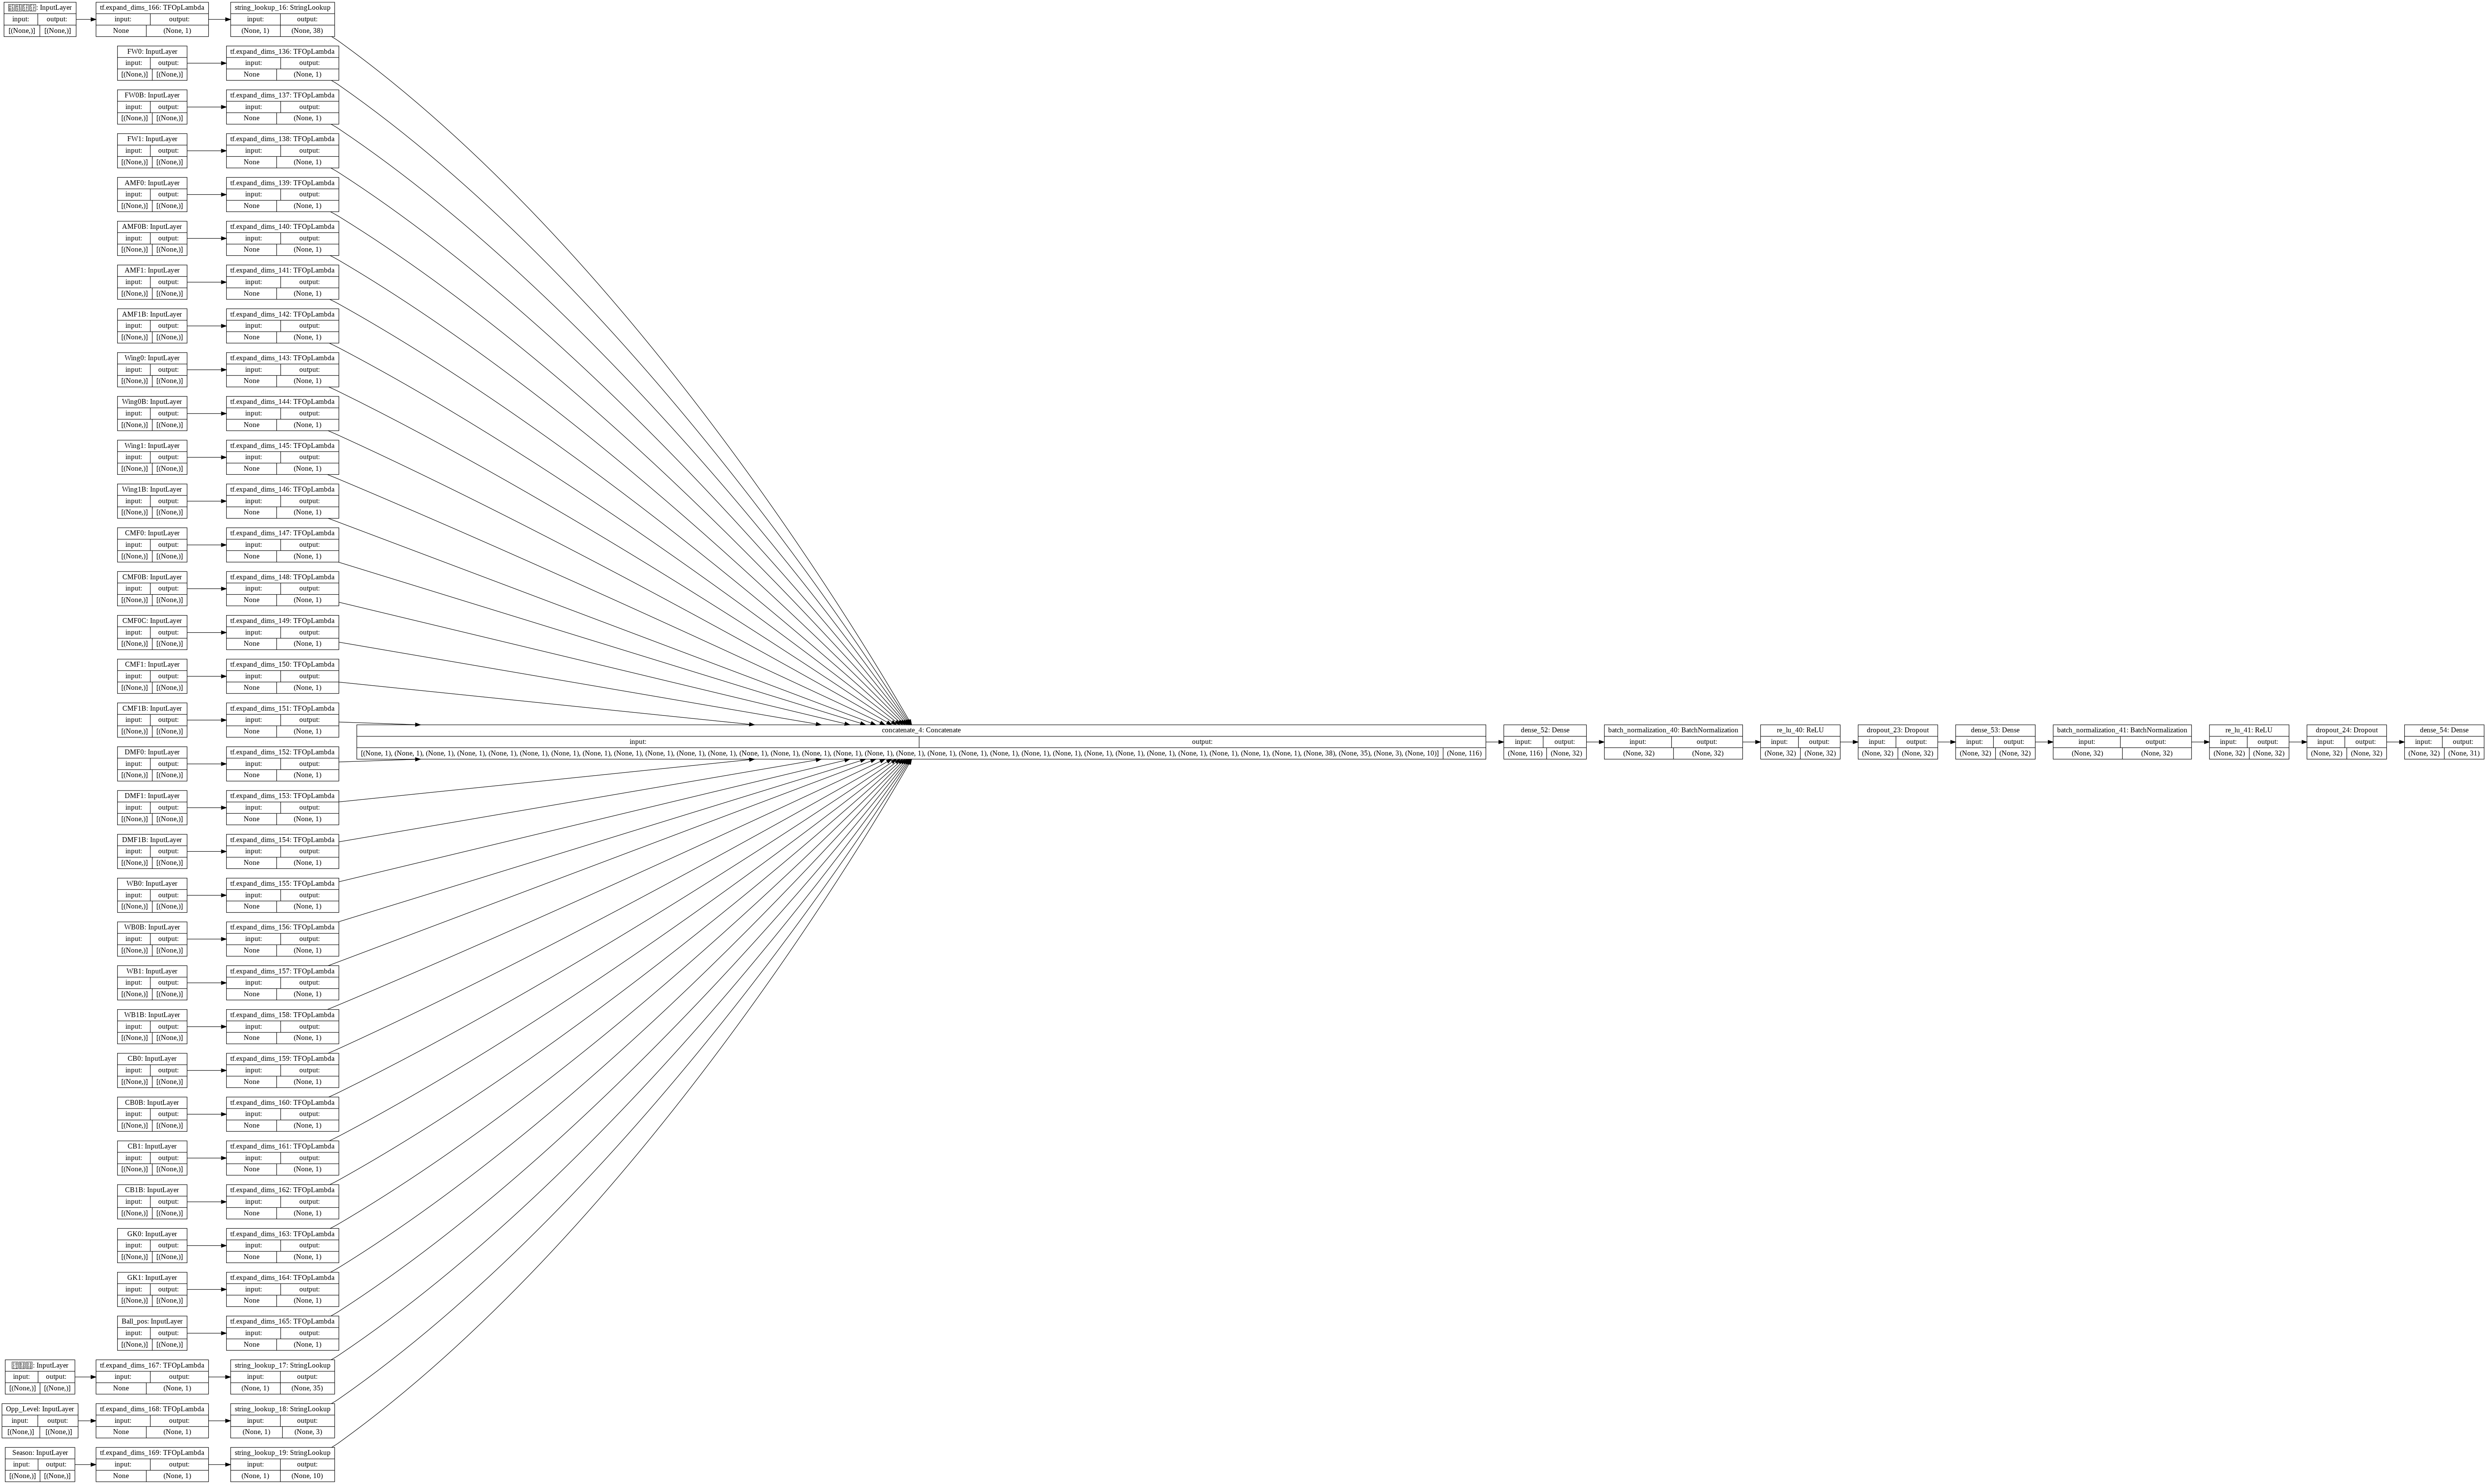

In [217]:
def create_baseline_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)

    for units in hidden_units:
        features = layers.Dense(units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.ReLU()(features)
        features = layers.Dropout(dropout_rate)(features)

    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model()
keras.utils.plot_model(baseline_model, show_shapes=True, rankdir="LR")

In [218]:
run_experiment(baseline_model)


Start training the model...
Epoch 1/50


InvalidArgumentError: ignored